# **SALES PREDICTION USING PYTHON** #

Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

for this we will follow this steps

  Look at the big picture.
  
  Get the data.
  
  Discover and visualize the data to gain insights.
 
  Prepare the data for Machine Learning algorithms.
 
  Select a model and train it.
 

### **Look at the big picture.** ###

**What is the Problem?**

The problem is about predicting future sales of a product or service. The goal is to build a machine learning model using Python that can accurately estimate how much of a product will be sold, based on different influencing factors like:

Advertising expenditure (how much money is spent on marketing)

Target audience segmentation (which group of customers are targeted)

Advertising platform (TV, social media, radio, etc.)



### **Get the data.** ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\manth\Desktop\codesoft\Task_4\advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


from data we can understand that there are 200 products and sales of them genrated by TV, Radio, Newspaper



### Data Explanation: advertising.csv

The `advertising.csv` dataset contains information about advertising expenditures and their impact on product sales. The columns are:

- **TV**: Amount spent on TV advertising (in thousands of dollars)
- **Radio**: Amount spent on radio advertising (in thousands of dollars)
- **Newspaper**: Amount spent on newspaper advertising (in thousands of dollars)
- **Sales**: Sales of the product (in thousands of units)

Each row represents a different observation, showing the relationship between advertising spend across different media and the resulting sales. This dataset is commonly used for regression analysis to predict sales based on advertising investments.

 #### **Take a Quick Look at the Data**

In [2]:
data.shape

(200, 4)

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:

data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## **Discover and visualize the data to gain insights.**

**Data Cleaning**

In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**visualize the data to gain insights**

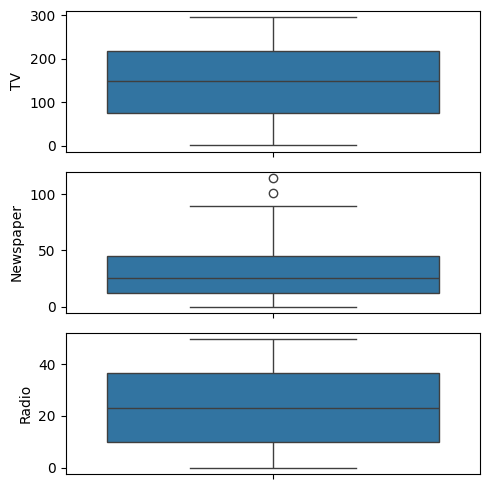

In [6]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

This box plot visualizes the distribution of advertising expenditures for TV, Newspaper, and Radio:

TV: The spending is widely spread, with most values between about 50 and 250. There are no significant outliers.

Newspaper: The spending is more concentrated, with a few outliers above 100. Most values are between about 10 and 60.

Radio: The spending is also concentrated, with most values between about 5 and 40, and no significant outliers.

The box plots show the median, quartiles, and any outliers for each advertising channel, helping to understand the spread and central tendency of the data.

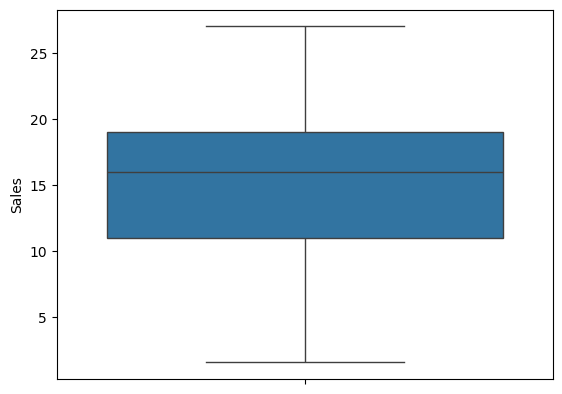

In [7]:
sns.boxplot(data['Sales'])
plt.show()


This box plot tells us about the distribution of sales values in the dataset:

- Most sales values are concentrated between the lower and upper edges of the box (the interquartile range).

- The median sales value (the line inside the box) shows the typical sales amount.

- The whiskers indicate the minimum and maximum sales, showing the overall range.

- There are no extreme outliers, suggesting sales values are fairly consistent.

In summary, the plot shows that sales are generally centered around the median, with a moderate spread and no unusual values.

**Let's see how Sales are related with other variables using scatter plot.**

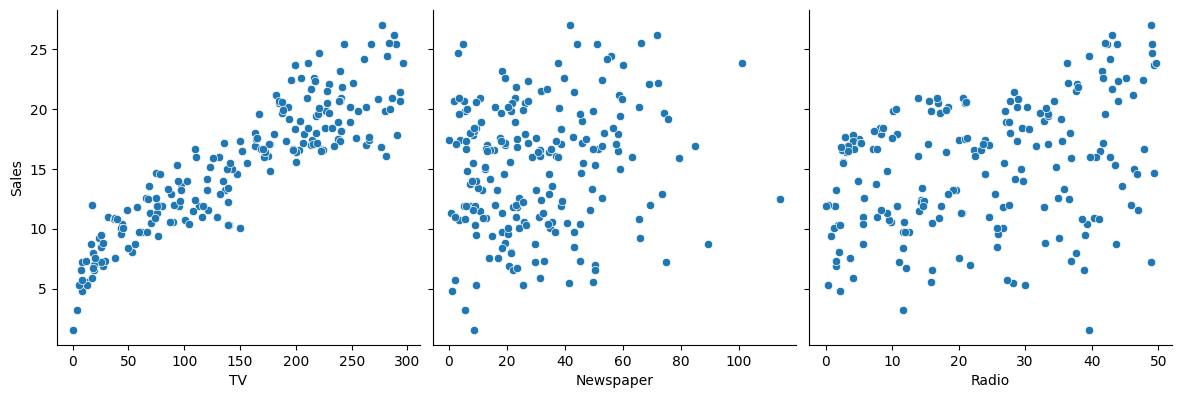

In [8]:

sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

This plot shows the relationship between advertising spend (TV, Newspaper, Radio) and Sales:

- **TV vs Sales**: There is a clear positive linear relationship—higher TV advertising spend is associated with higher sales.

- **Radio vs Sales**: There is also a positive relationship, though it is more scattered than TV, indicating some influence on sales.

- **Newspaper vs Sales**: The relationship is weaker and more dispersed, suggesting that newspaper advertising has less impact on sales compared to TV and Radio.

Overall, TV advertising appears to have the strongest effect on sales, followed by Radio, while Newspaper has the least influence.

## **Select a model and train it.** ##

### Suitable Model for Sales Prediction

For this task, a **Linear Regression** model is well-suited. This is because:

- The target variable (`Sales`) is continuous, making this a regression problem.
- The scatter plots show a linear relationship, especially between TV/Radio advertising and sales.
- Linear regression is simple, interpretable, and effective for modeling the relationship between advertising spend and sales.

Other models like **Ridge Regression**, **Lasso Regression**, or more complex models (e.g., Decision Trees, Random Forests) can also be considered if the data shows non-linearity or if we want to improve performance, but linear regression is a strong starting point for this dataset.

**Create a Test Set**

In [9]:
from sklearn.model_selection import train_test_split

# Features and target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [10]:
X_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [11]:
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

In [12]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

**Model fit**

Mean Squared Error: 2.91
R^2 Score: 0.91


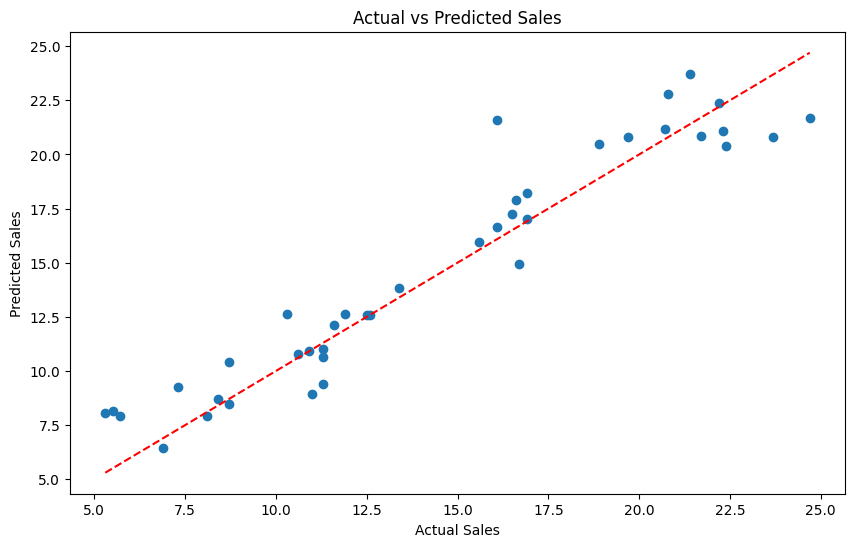

In [13]:
# Apply Linear Regression to predict Sales
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

## **User Input** ##

In [14]:
# Get user input for TV, Radio, Newspaper spend
tv = float(input("Enter TV advertising spend: "))
radio = float(input("Enter Radio advertising spend: "))
newspaper = float(input("Enter Newspaper advertising spend: "))

# Create a DataFrame for the input
user_input = pd.DataFrame([[tv, radio, newspaper]], columns=['TV', 'Radio', 'Newspaper'])

# Predict sales using the trained model
predicted_sales = model.predict(user_input)

print(f"Predicted Sales: {predicted_sales[0]:.2f}")

Predicted Sales: 12.29


## **Model Evaluation** 

Mean Squared Error (MSE): 2.91
Mean Absolute Error (MAE): 1.27
R^2 Score: 0.91


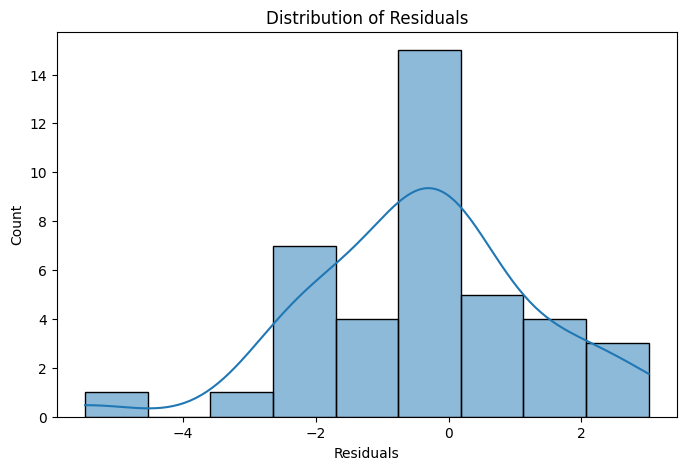

In [15]:
from sklearn.metrics import mean_absolute_error

# Model Evaluation

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

### Model Evaluation Explanation

After training the linear regression model, we evaluate its performance using several metrics and a visualization:

- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted sales values. Lower values indicate better model performance.
- **Mean Absolute Error (MAE):** Represents the average absolute difference between actual and predicted sales. Like MSE, lower values are better.
- **R² Score:** Indicates how well the model explains the variability of sales. Values closer to 1 mean the model fits the data well.

#### Explanation of the Actual vs Predicted Sales Graph

The scatter plot compares the actual sales (from the test set) to the sales predicted by the model:
- Each point represents a prediction for a test sample.
- The red diagonal line shows where predicted sales would exactly match actual sales.
- Points close to the red line indicate accurate predictions.
- If points are widely scattered from the line, it means the model's predictions are less accurate.

This visualization helps us quickly see how well the model is performing and whether there are any patterns in the prediction errors.
